In [2]:
import numpy as np
import matplotlib as plt
import sympy

m, b = sympy.symbols("m, b")
Funcion_Costo = (1/3)*((m+b-2)**2 + (m+b*3-4)**2 + (m+b*5-6)**2)
Funcion_Costo

0.333333333333333*(b + m - 2)**2 + 0.333333333333333*(3*b + m - 4)**2 + 0.333333333333333*(5*b + m - 6)**2

In [3]:
Derivada_Funcion_Costo = [Funcion_Costo.diff(m) , Funcion_Costo.diff(b)]
Derivada_Funcion_Costo

[6.0*b + 2.0*m - 8.0, 23.3333333333333*b + 6.0*m - 29.3333333333333]

In [4]:
Gradiente = sympy.Matrix(Derivada_Funcion_Costo)
Gradiente

Matrix([
[                          6.0*b + 2.0*m - 8.0],
[23.3333333333333*b + 6.0*m - 29.3333333333333]])

In [5]:
Hesseiana = [[Funcion_Costo.diff(m,m), Funcion_Costo.diff(m,b)], 
             [Funcion_Costo.diff(b,m), Funcion_Costo.diff(b,b)]]
Hesseianaa = sympy.Matrix(Hesseiana)
Hesseianaa

Matrix([
[2.0,              6.0],
[6.0, 23.3333333333333]])

In [6]:
f_lmbda = sympy.lambdify((m, b), Funcion_Costo, 'numpy')
fprime_lmbda = sympy.lambdify((m, b), Derivada_Funcion_Costo, 'numpy')
fhess_lmbda = sympy.lambdify((m, b), Hesseiana, 'numpy')

In [7]:
def func_XY_to_X_Y(f):
    """
    permite tomar dos vectores al mismo tiempo
    """
    return lambda X: np.array(f(X[0], X[1]))

In [8]:
f = func_XY_to_X_Y(f_lmbda)
fprima = func_XY_to_X_Y(fprime_lmbda)
fhessiana = func_XY_to_X_Y(fhess_lmbda)

In [9]:
import scipy
from scipy import optimize
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprima, fhess=fhessiana)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3


In [10]:
x_opt

array([1., 1.])

In [11]:
[x_opt ,allvecs] = optimize.fmin_ncg(f, (0, 0), fprime=fprima, fhess=fhessiana, retall=True )

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3


In [12]:
x_opt

array([1., 1.])

In [13]:
allvecs

[array([0, 0]),
 array([0.32125206, 1.17792422]),
 array([1., 1.]),
 array([1., 1.])]

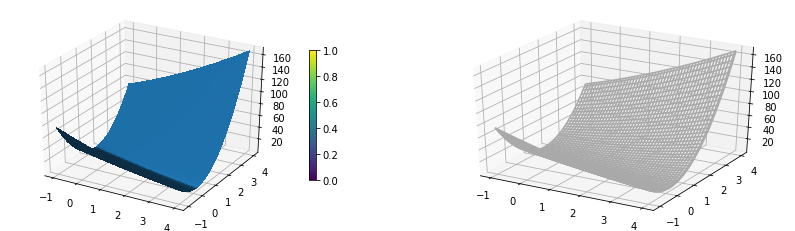

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#mpl.use('qt4agg')
fig, axes = plt.subplots(1, 2, figsize=(14, 4), subplot_kw={'projection': '3d'})
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
Z = (1/3)*((X+Y-2)**2 + (X+Y*3-4)**2 + (X+Y*5-6)**2)
#plt.plot_surface(X,Y,Z)

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1,linewidth=0, antialiased=False) 
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2,
color="darkgrey")

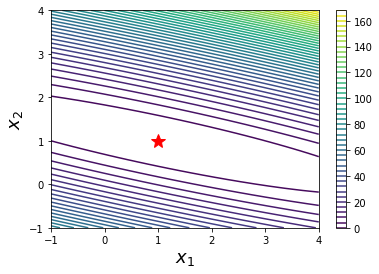

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

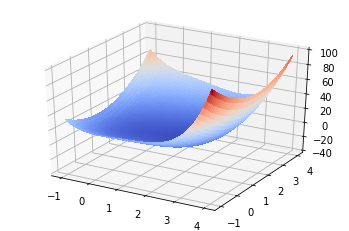

In [16]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
Z = (X-1)**4 + 5*(Y-1)**2 - 2*X*Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# limites del eje z.
ax.set_zlim(-40.01, 100)

plt.show()

In [17]:
x_opt2 = optimize.fmin_bfgs(f, (0, 0), fprime=fprima)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7


In [18]:
x_opt2

array([1.00000173, 0.9999996 ])

In [19]:
x_opt3 = optimize.fmin_cg(f, (0, 0), fprime=fprima)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6


In [20]:
x_opt3

array([1., 1.])

# Punto 2

Modelo l con archivo data.txt

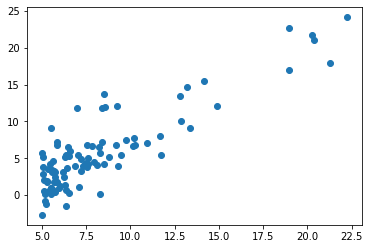

In [103]:
import pandas as pd
data = pd.read_csv("data1.txt")
data = np.array(data)

plt.plot(data[:,0], data[:,1], 'o')

In [104]:
filas, columnas = np.shape(data)
X = data[:,0]
X = X[:, np.newaxis]
X = np.hstack((np.ones((filas,1)), X))
Y = data[:,1]
Y = Y[:, np.newaxis]

calc = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
calc

array([[-4.21150401],
       [ 1.21354725]])

In [105]:
yCalc = calc[0][0] + calc[1][0]*data[:,0]
yCalc

array([ 2.49662115,  6.12621963,  4.28721012,  2.89964019,  5.96154127,
        4.86146068,  6.19842569,  3.65980619,  1.92249194,  2.7187003 ,
       12.9771793 ,  2.74697595,  5.99248672,  2.63375199,  2.31665209,
        3.51320968,  2.01411476,  3.59111942,  4.36924592,  3.2992613 ,
       20.38709883,  2.45099177,  3.46551728,  2.54176511, 18.77914872,
       11.35588017,  9.08533326, 11.77819461, 22.73288567,  2.16253159,
        3.78504427,  7.01162371,  2.93847371,  5.75305385,  5.41605178,
        5.61325321,  2.59200596, 11.36558855,  3.49864712,  2.35002464,
        4.14073497,  9.99670724,  2.79515377,  5.28413919,  4.39630802,
        1.94142328,  2.82876903,  9.98699887,  2.51348946,  4.938885  ,
        2.22964075,  4.79774945,  5.01521712,  3.47364804,  3.50532163,
        3.40253418,  2.63253844,  7.08686364,  7.26088631,  6.49853593,
        2.07382129, 21.61156801, 13.88005846, 18.79613838,  4.54812278,
        5.85499182,  8.21036569,  2.46227776, 20.47326069,  8.08

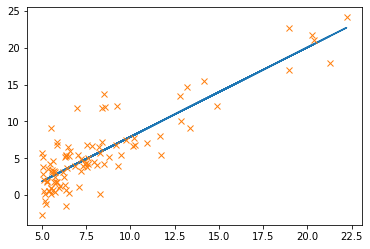

In [106]:
xsol = np.linspace(-2, 25, 25)
plt.plot(data[:,0], yCalc, data[:,0], data[:,1], 'x')